In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

from Lab_05.Began_Lab_05 import X_test

In [49]:
titanic_df=pd.read_csv("Titanic.csv")
titanic_df.drop(columns=['PassengerId'], inplace=True)
titanic_df.drop(columns=['Name'], inplace=True)
titanic_df.drop(columns=['SibSp'], inplace=True)
titanic_df.drop(columns=['Parch'], inplace=True)
titanic_df.drop(columns=['Ticket'], inplace=True)
titanic_df.drop(columns=['Cabin'], inplace=True)
print(titanic_df.head())

   Survived  Pclass     Sex   Age     Fare Embarked
0         0       3    male  22.0   7.2500        S
1         1       1  female  38.0  71.2833        C
2         1       3  female  26.0   7.9250        S
3         1       1  female  35.0  53.1000        S
4         0       3    male  35.0   8.0500        S


In [50]:
print(titanic_df.isnull().sum())
#titanic_df.fillna({'Sex': 'N/A', 'Embarked': 'N/A'}, inplace=True)

titanic_df.fillna(titanic_df.mean(numeric_only=True), inplace=True)

print(titanic_df.head())

Survived      0
Pclass        0
Sex           0
Age         263
Fare          1
Embarked      2
dtype: int64
   Survived  Pclass     Sex   Age     Fare Embarked
0         0       3    male  22.0   7.2500        S
1         1       1  female  38.0  71.2833        C
2         1       3  female  26.0   7.9250        S
3         1       1  female  35.0  53.1000        S
4         0       3    male  35.0   8.0500        S


In [57]:
from sklearn.preprocessing import LabelEncoder  

encode = LabelEncoder()
titanic_df['Sex']=encode.fit_transform(titanic_df['Sex'])
titanic_df['Embarked']=encode.fit_transform(titanic_df['Embarked'])
print(titanic_df.head())

   Survived  Pclass  Sex   Age     Fare  Embarked
0         0       3    1  22.0   7.2500         2
1         1       1    0  38.0  71.2833         0
2         1       3    0  26.0   7.9250         2
3         1       1    0  35.0  53.1000         2
4         0       3    1  35.0   8.0500         2


In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#split into train and test
X = titanic_df.drop('Survived', axis=1)
Y = titanic_df.Survived
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca= PCA()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
variance = pca.explained_variance_ratio_

print(variance)


[0.3766963  0.21835525 0.17760611 0.14647771 0.08086462]


In [72]:
from sklearn.model_selection import train_test_split

x=titanic_df.drop(columns=['Survived'])
y=titanic_df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=38)
print("training set: ", {x_train.shape[0]})
print("test set: ", {x_test.shape[0]})



training set:  {1047}
test set:  {262}


In [80]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
model=GradientBoostingClassifier()

model.fit(X_train,Y_train)
pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
pred_GBC = model.predict(X_test)
score=accuracy_score(Y_test,pred_GBC)
print(f'Accuracy GBC: {round(score*100,2)}%')

Accuracy GBC: 84.73%


In [81]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
pred_GNB = model.predict(x_test)
score2=accuracy_score(y_test,pred_GNB)
print(f'Accuracy GNB: {round(score2*100,2)}%')

Accuracy GNB: 82.44%


In [84]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
pred_RFC = model.predict(x_test)
score3=accuracy_score(y_test,pred_RFC)
print(f'Accuracy RF: {round(score3*100,2)}%')

Accuracy RF: 81.3%


In [85]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
pred_SVC = model.predict(x_test)
score4=accuracy_score(y_test,pred_SVC)
print(f'Accuracy SVM: {round(score4*100,2)}%')

Accuracy SVM: 63.74%


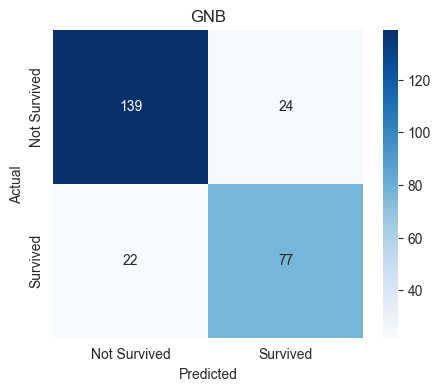

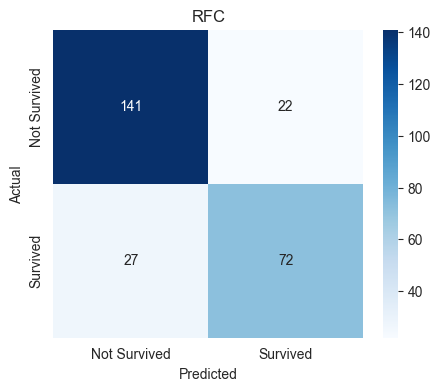

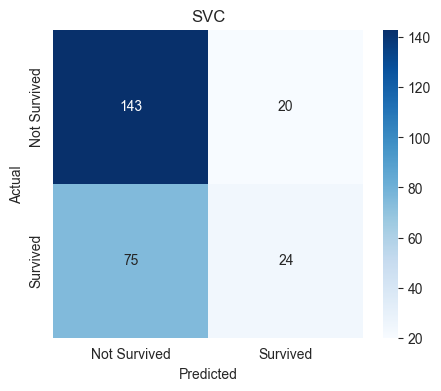

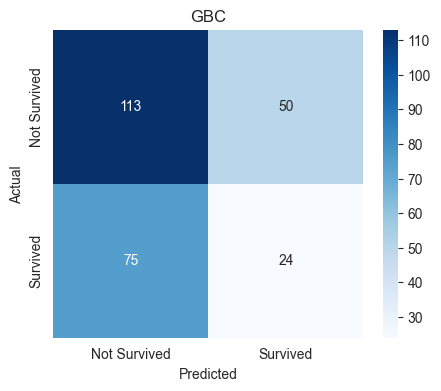

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Plot confusion matrices for each classifier
plot_confusion_matrix(y_test, pred_GNB, "GNB")
plot_confusion_matrix(y_test, pred_RFC, "RFC")
plot_confusion_matrix(y_test, pred_SVC, "SVC")
plot_confusion_matrix(y_test, pred_GBC, "GBC")